# acceptance factor of (e,e'pp)/(e,e'p) ratio 

# imports

In [1]:
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from pylab import *
majorLocator   = MultipleLocator(0.01)
%matplotlib inline

# read data

# histograms of fractions of lost events in each p(miss) bin

In [2]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
pmiss_analysis_bins , pmiss_analysis_bins_center , pmiss_multiples_bins , pmiss_bin_center = [] , [] , [] , []
for i in range(len(PmissBins)):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    for j in range(4):
        pmiss_multiples_bins.append( [ pmin + float(j*(pmax-pmin))/4 , pmin + float((j+1)*(pmax-pmin))/4 ])
    for j in range(2):
        pmiss_analysis_bins.append( [ pmin + float(j*(pmax-pmin))/2 , pmin + float((j+1)*(pmax-pmin))/2 ])

for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
print 'pmiss_bin_center:',pmiss_bin_center
for i in range( len(pmiss_analysis_bins) ):
    pmin , pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
    pmiss_analysis_bins_center.append(0.5*(pmin+pmax))
print 'pmiss_analysis_bins_center:',pmiss_analysis_bins_center

pmiss_bin_center: [0.31875, 0.35625, 0.39375, 0.43125, 0.4625, 0.48750000000000004, 0.5125, 0.5375000000000001, 0.5625, 0.5875000000000001, 0.6125, 0.6375, 0.6625000000000001, 0.6875, 0.7124999999999999, 0.7375, 0.78125, 0.84375, 0.90625, 0.96875]
pmiss_analysis_bins_center: [0.3375, 0.4125, 0.475, 0.525, 0.5750000000000001, 0.625, 0.675, 0.725, 0.8125, 0.9375]


# (e,e'pp)/(e,e'p) ratio from DATA with no acceptance correction

In [13]:
def eepp_eep_ratio(eep=TPlots() , eepp=TPlots(), cut_name='nominal_cuts',
                        target = 'C12', target_name = '$^{12}$C',
                        pmiss_bins=None, 
                        do_print = False,
                        do_save_plots=True):
    pmiss_bin_center = []
    eep_in_bin , eepp_in_bin , ratio , ratio_err =  [] , [] , [] , []
    for i in range( len(pmiss_bins) ):
        pmin , pmax = pmiss_bins[i][0] , pmiss_bins[i][1]
        pmiss_bin_center.append(0.5*(pmin+pmax))
        eep_in_bin.append( eep.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
        eepp_in_bin.append( eepp.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
        ratio.append(100*float(eepp_in_bin[-1])/eep_in_bin[-1])
        ratio_err.append(ratio[-1] * np.sqrt(1./eepp_in_bin[-1] + 1./eep_in_bin[-1]))
    
    eep.Close()
    eepp.Close()
    
    fig,ax = plt.subplots(figsize=(15,10))
    plt.errorbar(pmiss_bin_center,ratio,xerr=np.zeros(len(pmiss_bin_center)),yerr=ratio_err,fmt='ro', color='black',markersize=20)
    set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%target_name + ' [%]')
    ax.grid()
    ax.set_ylim(0,1.02*np.max(ratio)+np.max(ratio_err))
    ax.set_xlim(0.25,1.01)
    
    if do_save_plots:
        fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/sensitivity_studies/eeppeep_measured_%s_%s.pdf'%(cut_name,target))

    return pmiss_bin_center , ratio , ratio_err

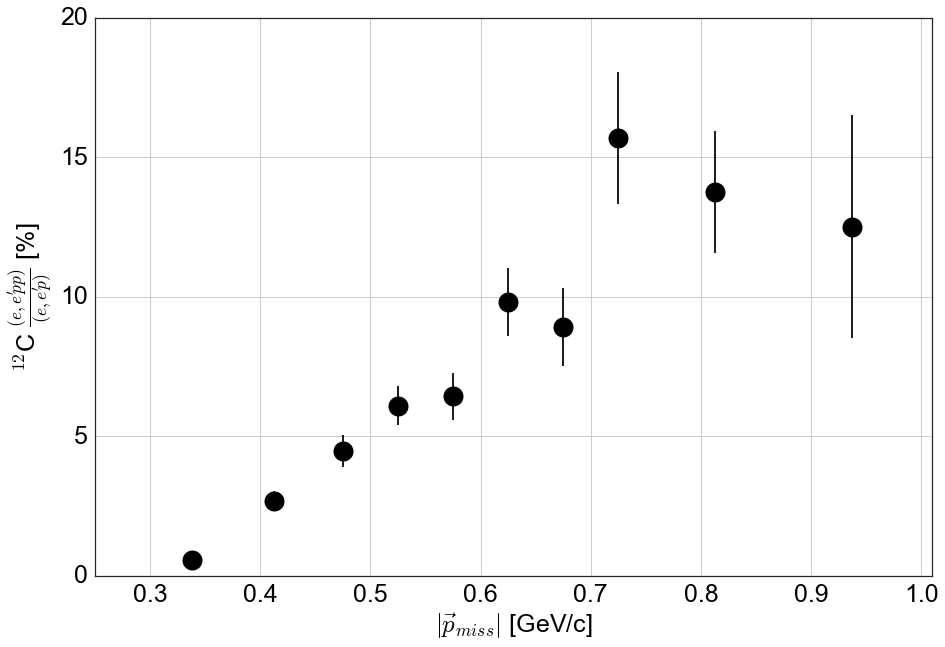

In [14]:
target = 'C12'
target_name = '$^{12}$C'
eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

pmiss_bin_center , ratio , ratio_err = eepp_eep_ratio(eep=eep , eepp=eepp,                                                        
                                                      cut_name='nominal_cuts',                                                      
                                                      target=target, target_name=target_name,                                                      
                                                      pmiss_bins=pmiss_analysis_bins,                                                                        
                                                      do_print = False,                                                       
                                                      do_save_plots=False)

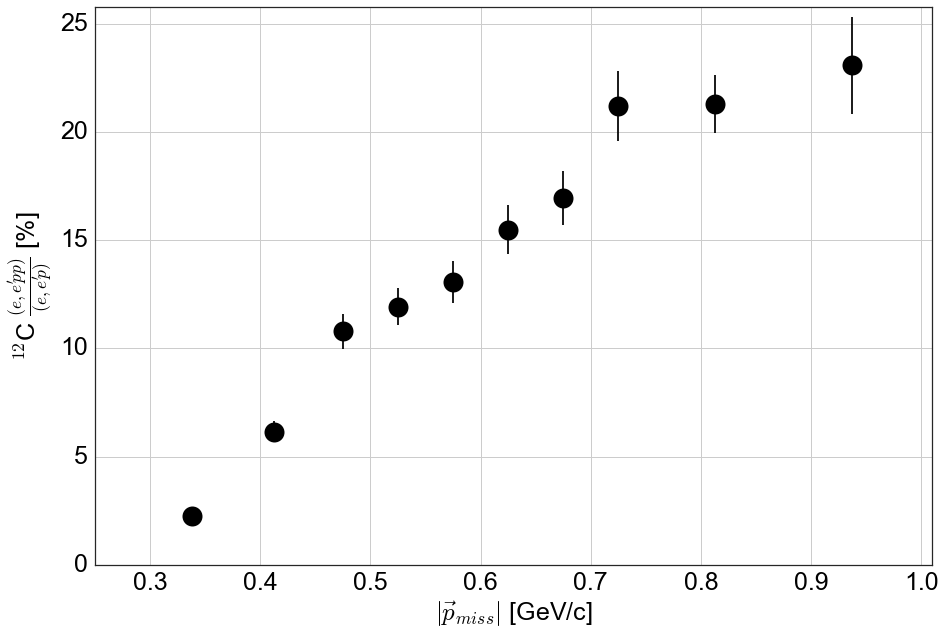

In [15]:
eep_relaxed = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_relaxed_ppSRCCut_DATA_%s.root'%target , 'anaTree')
eepp_relaxed = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_relaxed_ppSRCCut_DATA_%s.root'%target , 'anaTree')

pmiss_bin_center , ratio_relaxed , ratio_relaxed_err = eepp_eep_ratio(eep=eep_relaxed , eepp=eepp_relaxed, 
                                                                      cut_name='relaxed_cuts',                      
                                                                      target=target, target_name=target_name,
                                                                      pmiss_bins=pmiss_analysis_bins,                  
                                                                      do_print = False, 
                                                                      do_save_plots=False)

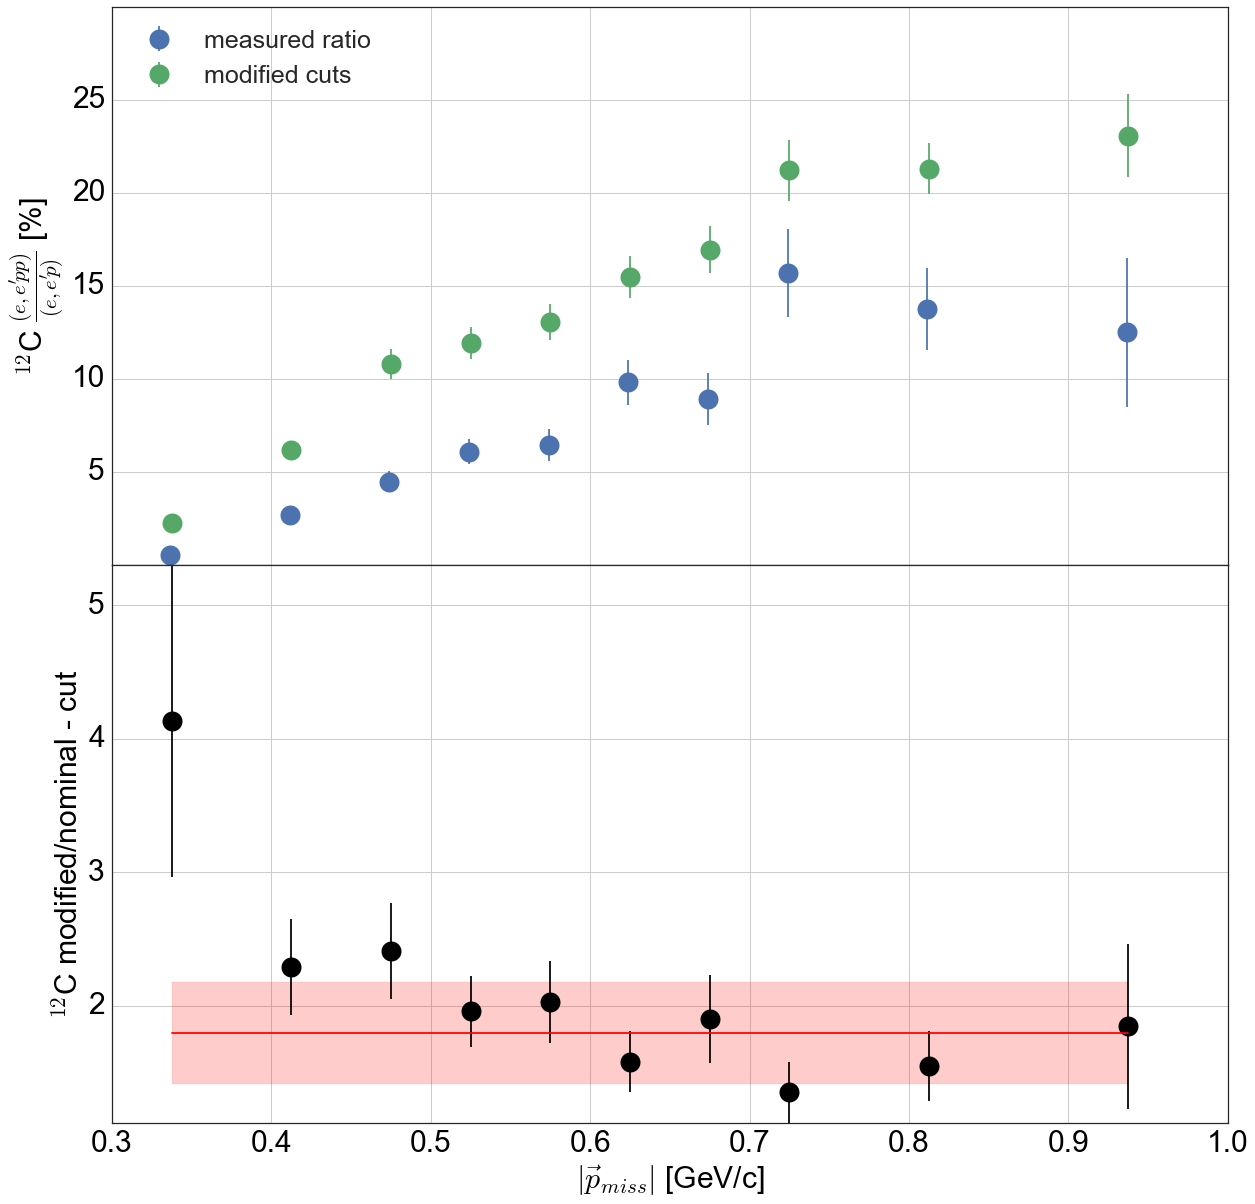

In [62]:
do_save_fig = True
cut_name = 'all_modified'
fig = plt.figure(figsize=(20,20))

x = pmiss_bin_center
ax = fig.add_subplot(211)
ax.errorbar(x-0.001*np.ones(len(x)) , ratio , yerr=ratio_err , label='measured ratio' , fmt='o',markersize=20)
ax.errorbar(x , ratio_relaxed , yerr=ratio_relaxed_err , label='modified cuts' , fmt='o', markersize=20)
ax.xaxis.set_major_formatter( NullFormatter() )
set_axes(ax,x_label='',y_label=r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%target_name + ' [%]',fontsize=30)
ax.legend(fontsize=25,loc='best')#,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid()
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start+5, end, 5))


ax = fig.add_subplot(212)
y = [ratio_relaxed[i]/ratio[i] for i in range(len(x))]
y_err = [y[i] * np.sqrt(np.square(ratio_err[i]/ratio[i])
                        +np.square(ratio_relaxed_err[i]/ratio_relaxed[i])) for i in range(len(x)) ]
ax.errorbar(x , y , yerr=y_err , fmt='o',markersize=20 , color='black')
ax.grid()
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start+1, end, 1))

average = np.average( y , weights=1./np.square(y_err))
variance = np.average((y-average)**2, weights=1./np.square(y_err))
std = np.sqrt(variance)
plt.plot( x , average*np.ones(len(x)) , '-' , color='red')
plt.fill_between( x , (average-std)*np.ones(len(x)) , (average+std)*np.ones(len(x)) , color='red' , alpha=0.2)

set_axes(ax,x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',
         y_label=r"%s modified/nominal - cut"%target_name,
         fontsize=30)

subplots_adjust(wspace=0.12,hspace=0)
if do_save_fig:
    fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/sensitivity_studies/eepp_eep_modifiedcut_%s.pdf'%cut_name)